In [1]:
%matplotlib inline

## questionario di Ateneo

Si accede da qui:

https://almaorienta.unibo.it/scuole-superiori/alternanza-scuola-lavoro


E poi cliccando su “Per gli studenti” (Monitoraggio MODULO 2)

# Network Biologici

Oggi studiamo come analizzare alcuni network biologici.

Ne vedremo in particolare uno, chiamato diseasoma, che connette i geni e le malattie, e vedremo come lo possiamo usare per ricavare informazioni a proposito di alcuni geni e del modo in cui questi si sono evoluti.

Per fare questo dovremo usare i network.

Una delle più famose librerie per la gestione dei network in python è **networkx**, che rende molto semplice la gestione dei network.

**Networkx** non è computazionalmente molto potente, ma può lavorare su network molto complessi (come tipo di informazioni contenute), ed in questo caso ci rende la vita più semplice.

In [2]:
import networkx as nx
import pylab as plt

G = nx.Graph()

Iniziamo definendo quali siano i nodi del nostro network.

Per iniziare con una cosa comprensibile, consideriamo un network di persone ed interessi.

Dobbiamo per prima cosa definire quali siano le persone presente e gli argomenti disponibili come interessi

In [3]:
G.add_node('Enrico', tipo='persona')
G.add_node('Daniel', tipo='persona')
G.add_node('Giulia', tipo='persona')
G.add_node('Claudia', tipo='persona')
G.add_node('Gastone', tipo='persona')

In [4]:
G.add_node('Python', tipo='argomento')
G.add_node('R', tipo='argomento')
G.add_node('Matlab', tipo='argomento')
G.add_node('Mathematica', tipo='argomento')

Possiamo ora inserire la lista delle connessioni fra le persone ed i loro interessi.

In [5]:
G.add_edge('Enrico', 'Python')
G.add_edge('Claudia', 'Python')
G.add_edge('Claudia', 'R')
G.add_edge('Daniel', 'Matlab')
G.add_edge('Giulia', 'Matlab')
G.add_edge('Giulia', 'Python')

G.add_edge('Gastone', 'Mathematica')

Networkx ci permette una semplice visualizzazione.

non è molto piacevole (conviene usare programmi dedicati, come Gephi, per fare visualizzazioni più raffinate), ma è molto semplice ed è abbastanza per i nostri scopi

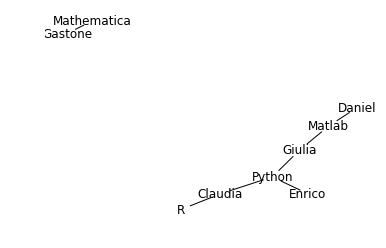

In [12]:
nx.draw_networkx(G, node_color='white', linewidths=0)
plt.axis('off');

ci sono molte funzioni di utilità a disposizione, ad esempio per vedere la lista dei nodi a disposizione o le proprietà di ogni singolo nodo

In [13]:
print(list(G))

['Enrico', 'Daniel', 'Giulia', 'Claudia', 'Gastone', 'Python', 'R', 'Matlab', 'Mathematica']


In [14]:
print(G.nodes())

['Enrico', 'Daniel', 'Giulia', 'Claudia', 'Gastone', 'Python', 'R', 'Matlab', 'Mathematica']


In [15]:
G.node['Enrico']

{'tipo': 'persona'}

Posso anche selezionare tutti i nodi di un tipo in base alle proprietà dei nodi in modo abbastanza semplice

In [93]:
[n for n in G if G.node[n]['tipo']=='argomento']

['Python', 'R', 'Matlab', 'Mathematica']

In [94]:
[n for n, i in G.nodes(data=True) if i['tipo']=='argomento']

['Python', 'R', 'Matlab', 'Mathematica']

In [17]:
[n for n in G if G.node[n]['tipo']=='persona']

['Enrico', 'Daniel', 'Giulia', 'Claudia', 'Gastone']

Ho anche funzioni che mi permettono di vedere proprietà dai nodi.

Una che useremo molto è la funzione **degree**, che restituisce il numero dei vicini che ciascun nodo ha.

In [18]:
print(nx.degree(G))

[('Enrico', 1), ('Daniel', 1), ('Giulia', 2), ('Claudia', 2), ('Gastone', 1), ('Python', 3), ('R', 1), ('Matlab', 2), ('Mathematica', 1)]


Possiamo anche chiedere informazioni su quali siano i possibili cammini che mi uniscono due nodi.

In [19]:
nx.shortest_path(G, source='Enrico', target='Daniel')

['Enrico', 'Python', 'Giulia', 'Matlab', 'Daniel']

La funzione che ci interessa di più per oggi è la possibilità di far coalescere il network su un sottoinsieme di nodi.

Questa funzione ritorna un nuovo network che ha come nodi i nodi che gli diamo in input, ed inserisce un link fra due nodi se questi hanno un vicino in comune.

In [20]:
from networkx.algorithms.bipartite import  projected_graph

nodi = [n for n in G if G.node[n]['tipo']=='persona']
B = projected_graph(G, nodi)

print(B.nodes())
print(B.edges())

['Enrico', 'Daniel', 'Giulia', 'Claudia', 'Gastone']
[('Enrico', 'Claudia'), ('Enrico', 'Giulia'), ('Daniel', 'Giulia'), ('Giulia', 'Claudia')]


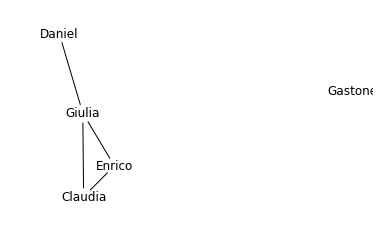

In [22]:
nx.draw_networkx(B, node_color='w')
plt.axis('off');

Questo network è chiaramente diviso in due pezzi separati, visto che un nodo non è connesso a nessun altro.

Posso quindi dividerlo in pezzi e studiarne ciascuno indipendentemente.

In [23]:
componenti = list(nx.connected_component_subgraphs(B))
print(componenti)
print(len(componenti))
print(len(componenti[0]))
print(len(componenti[1]))

[<networkx.classes.graph.Graph object at 0x7fdb05d61ba8>, <networkx.classes.graph.Graph object at 0x7fdb05d61550>]
2
4
1


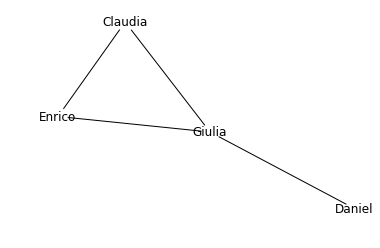

In [24]:
nx.draw_networkx(componenti[0], node_color='w')
plt.axis('off');

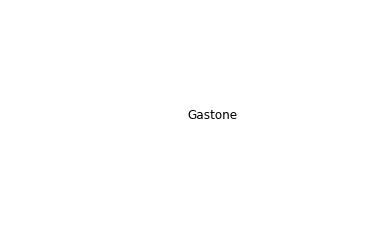

In [25]:
nx.draw_networkx(componenti[1], node_color='w')
plt.axis('off');

## Reti metaboliche con KEGG

KEGG è un database libero che contiene dati curati a mano che descrive le relazioni fra diverse componenti del metabolismo delle cellule.

Vogliamo creare un network usando le relazioni metaboliche fra geni.

Ogni gene è responsabile di un enzima.
Due enzimi possono interagire nella stessa reazione chimica.

Vogliamo connettere due geni se i loro enzimi partecipano alla stessa reazione e vedere cosa ne viene fuori

per scaricare i dati da KEGG mi basta connettermi ad una pagina web, e li scarica come file di testo.

In particolare avremo bisogno di una pagina:
* la lista di relazioni fra geni e malattie

una volta che avremo queste relazioni, possiamo unirle in un unico enorme network, ed ottenere la rete dei geni facendo lo stesso collasso che abbiamo fatto prima.

In [26]:
import requests
url = "http://rest.kegg.jp/link/disease/hsa"
gene_disease = requests.get(url).text

In [27]:
print(repr(gene_disease[:20]))

'hsa:7428\tds:H00021\nh'


In [95]:
print(gene_disease.splitlines()[:3])

['hsa:7428\tds:H00021', 'hsa:4233\tds:H00021', 'hsa:2271\tds:H00021']


In [ ]:
with open("hsa.txt", 'r') as infile:
    for line in infile:
        gene, disease = line.strip().split('\t')
        print(gene, disease)

In [29]:
for line in gene_disease.splitlines()[:10]:
    gene, disease = line.split('\t')
    print(gene, disease)

hsa:7428 ds:H00021
hsa:4233 ds:H00021
hsa:2271 ds:H00021
hsa:201163 ds:H00021
hsa:7030 ds:H00021
hsa:894 ds:H00023
hsa:411 ds:H00131
hsa:1075 ds:H00274
hsa:2720 ds:H00281
hsa:2588 ds:H00123


In [30]:
info = requests.get("http://rest.kegg.jp/get/hsa:7428").text
print(info)
#print("\n".join(info.splitlines()[1:4]))

ENTRY       7428              CDS       T01001
NAME        VHL, HRCA1, RCA1, VHL1, pVHL
DEFINITION  (RefSeq) von Hippel-Lindau tumor suppressor
ORTHOLOGY   K03871  von Hippel-Lindau disease tumor supressor
ORGANISM    hsa  Homo sapiens (human)
PATHWAY     hsa04066  HIF-1 signaling pathway
            hsa04120  Ubiquitin mediated proteolysis
            hsa05200  Pathways in cancer
            hsa05211  Renal cell carcinoma
MODULE      hsa_M00383  ECV complex
NETWORK     N00080  Loss of VHL to HIF-1 signaling pathway
DISEASE     H00021  Renal cell carcinoma
            H00236  Congenital polycythemia
            H00559  von Hippel-Lindau syndrome
            H01510  Malignant paraganglioma
BRITE       KEGG Orthology (KO) [BR:hsa00001]
             09120 Genetic Information Processing
              09123 Folding, sorting and degradation
               04120 Ubiquitin mediated proteolysis
                7428 (VHL)
             09130 Environmental Information Processing
              0913

In [31]:
KEGG = nx.Graph()

with open("hsa.txt", 'r') as infile:
    for line in infile:
        gene, disease = line.strip().split('\t')
        KEGG.add_node(disease, tipo='disease')
        KEGG.add_node(gene, tipo='gene')
        KEGG.add_edge(gene, disease)

/home/enrico/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


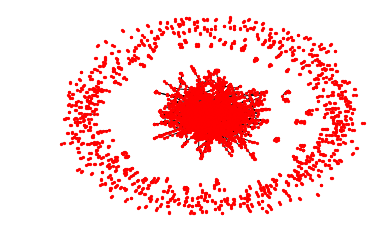

In [32]:
nx.draw_networkx(KEGG, node_size=5, with_labels=False)
plt.axis('off');

In [33]:
geni = [n for n in KEGG if KEGG.node[n]['tipo']=='gene']
malattie = [n for n in KEGG if KEGG.node[n]['tipo']=='disease']

In [34]:
gene_net = projected_graph(KEGG, geni)
len(gene_net)

3547

In [35]:
disease_net = projected_graph(KEGG, malattie)
len(disease_net)

1786

In [36]:
sottografi = list(nx.connected_component_subgraphs(disease_net))
sottografi = sorted(sottografi, key=len, reverse=True)
len(sottografi)

552

In [37]:
list(map(len, sottografi[:10]))

[1127, 8, 8, 6, 5, 5, 4, 4, 4, 4]

In [38]:
sottografi = list(nx.connected_component_subgraphs(gene_net))
sottografi = sorted(sottografi, key=len, reverse=True)
len(sottografi)

552

In [39]:
list(map(len, sottografi[:10]))

[2657, 34, 19, 17, 14, 13, 10, 8, 8, 7]

In [40]:
B = sottografi[0]
list(B)[:5]

['hsa:7428', 'hsa:4233', 'hsa:2271', 'hsa:201163', 'hsa:7030']

In [41]:
import operator as op
sorted(B.degree().items(),
       key=op.itemgetter(1),
       reverse=True)[:5]

[('hsa:57465', 137),
 ('hsa:7157', 131),
 ('hsa:4000', 121),
 ('hsa:1499', 113),
 ('hsa:1778', 104)]

In [42]:
info = requests.get("http://rest.kegg.jp/get/hsa:7157").text
print("\n".join(info.splitlines()[1:4]))

NAME        TP53, BCC7, BMFS5, LFS1, P53, TRP53
DEFINITION  (RefSeq) tumor protein p53
ORTHOLOGY   K04451  tumor protein p53


In [43]:
info = requests.get("http://rest.kegg.jp/get/hsa:4000").text
print("\n".join(info.splitlines()[1:4]))

NAME        LMNA, CDCD1, CDDC, CMD1A, CMT2B1, EMD2, FPL, FPLD, FPLD2, HGPS, IDC, LDP1, LFP, LGMD1B, LMN1, LMNC, LMNL1, MADA, PRO1
DEFINITION  (RefSeq) lamin A/C
ORTHOLOGY   K12641  lamin A/C


# Modellizzare il network

Vorremmo descrivere il nostro network, cercando di intuirne delle proprietà.

Usiamo un approccio simile a quello che abbiamo fatto con la divina commedia:
partendo da dei modelli probabilistici, vediamo se riusciamo a generare qualcosa che assomigli al nostro network.

Partiamo con il modello più semplice possibile, quello random.
In teoria dei network questo modello viene di solito chiamato modello di [Erdős–Rényi](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) (dai matematici che ne hanno studiato le proprietà per primi).

In questo modello parto dall'ipotesi che ci sia una probabilità fissata per l'esistenza di ogni link.

posso stimare questa probabilità in base al numero di link esistenti rispetto a tutti quelli che potrebbero esistere fra i vari nodi.

In [44]:
sottografi = list(nx.connected_component_subgraphs(gene_net))
sottografi = sorted(sottografi, key=len, reverse=True)
B = sottografi[0]

In [45]:
N = len(B)
num_of_possible_links = (N*(N-1)/2)
p = len(B.edges()) / num_of_possible_links
print(p)

0.007850653649600282


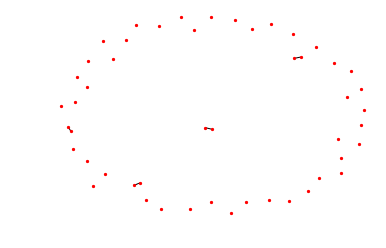

In [46]:
B_hat = nx.erdos_renyi_graph(50, p)
nx.draw_networkx(B_hat, node_size=5, with_labels=False)
plt.axis('off');

In [47]:
B_hat = nx.erdos_renyi_graph(len(B), p)

In [48]:
gradi_B = [val for key, val in B.degree()]
gradi_b_hat = [val for key, val in B_hat.degree()]

In [49]:
from statistics import mean, median

In [50]:
print(mean(gradi_B))
print(mean(gradi_b_hat))

20.85133609333835
20.822732404968008


In [51]:
print(max(gradi_B))
print(max(gradi_b_hat))

137
37


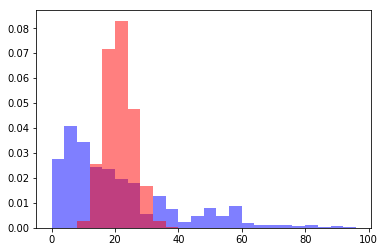

In [53]:
import pylab as plt

bins = range(0, 100, 4)
props = dict(density=True, alpha=0.5, bins=bins)

plt.hist(gradi_B, **props, color='b')
plt.hist(gradi_b_hat, **props, color='r');

Il prossimo modello è un modello di accrescimento, chiamato Barabasi-Albert.

In questo modello parto da un nodo più antico e aggiungo progressivamente nuovi nodi.

Questi nodi hanno a disposizione un certo numero di link, e si connettono con i nodi già presenti.

La probabilità di connettersi ad un nodo è proporzionale alla frazione di nodi già connessi con lui.

Viene definito un modello "Rich get Richer".

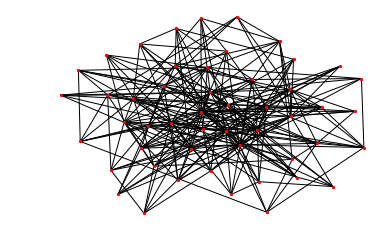

In [54]:
BBA = nx.barabasi_albert_graph(50, 6)
nx.draw_networkx(BBA, node_size=5, with_labels=False)
plt.axis('off');

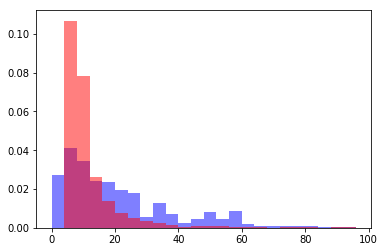

In [55]:
BBA = nx.barabasi_albert_graph(len(B), 6)

gradi_bba = [val for key, val in BBA.degree()]

plt.hist(gradi_B, **props, color='b')
plt.hist(gradi_bba, **props, color='r');

Un modello di ispirazione più biologica è il duplication divergence.

Anche in questo caso parto da un piccolo set di nodi iniziali.
Ad ogni passo scelgo a caso uno di questi nodi e lo duplico, duplicando anche tutte le sue connessioni.

Dopo la duplicazione, rimuovo a caso alcuni dei link che ha, e ne aggiungo di nuovi in modo casuale.

Questo processo assomiglia molto il processo di evoluzione naturale dei geni, in quello che è chiamato un processo di evoluzione neutrale.

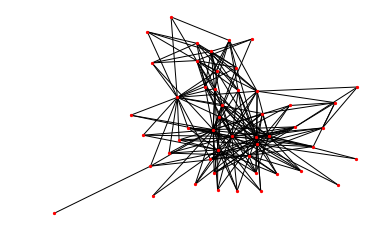

In [58]:
BDD = nx.duplication_divergence_graph(50, 0.7)
nx.draw_networkx(BDD, node_size=5, with_labels=False)
plt.axis('off');

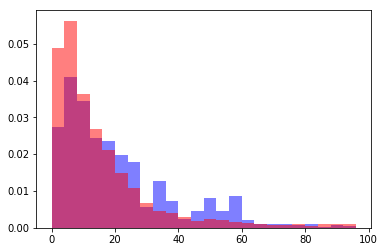

In [59]:
BDD = nx.duplication_divergence_graph(len(B), 0.7)

gradi_bdd = [val for key, val in BDD.degree()]

plt.hist(gradi_B, **props, color='b')
plt.hist(gradi_bdd, **props, color='r');

# Reti di parole

Se volessimo, potremmo fare un network di parole, basato sulla distanza di edit.

Possiamo copiare una implementazione da wikipedia:

https://en.wikibooks.org/wiki/Algorithm_Implementation/Strings/Levenshtein_distance#Python

In [60]:
def lev(a, b):
    if not a: return len(b)
    if not b: return len(a)
    return min(lev(a[1:], b[1:])+(a[0] != b[0]),
               lev(a[1:], b)+1, lev(a, b[1:])+1)

lev('canna', 'cannone')

3

In [61]:
def lev(a, b):
    assert len(a)==len(b)
    totale = 0
    for (ai, bi) in zip(a, b):
        if ai!=bi:
            totale += 1
    return totale

lev('canna', 'manna'), lev('canna', 'manno')

(1, 2)

In [62]:
parole = ['gatto', 'patto', 'patio', 'matto', 'masso', 'lasso',
          'casto', 'casta', 'pasta', 'rasta', 'messa', 'massa',
          'cassa', 'bassa', 'pazzo', 'lessa', 'lesso', 'messo',
          'mezzo', 'mezza', 'rosso', 'rossa', 'mosso', 'mossa',
          'morso', 'morsa', 'corso', 'corsa', 'colza', 'cozza',
          'razza', 'razzo', 'rozza', 'rozzo', 'ressa', 'rissa',
          'ritta', 'ritto', 'risma', 'fitto', 'fitta', 'finto',
          'finta',
         ]

words = nx.Graph()
from itertools import combinations
for parola1, parola2 in combinations(parole, 2):
    if lev(parola1, parola2)==1:
        words.add_edge(parola1, parola2)

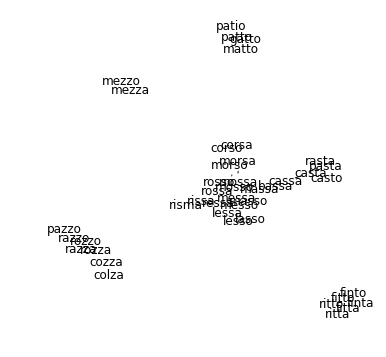

In [63]:
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw_networkx(words, node_color='w')
ax.axis('off');

In [64]:
for sottografo in nx.connected_component_subgraphs(words):
    print()
    print(sottografo.nodes())


['gatto', 'matto', 'patio', 'patto']

['masso', 'lasso', 'massa', 'messo', 'mosso', 'lesso', 'casto', 'casta', 'pasta', 'rasta', 'cassa', 'messa', 'lessa', 'mossa', 'ressa', 'bassa', 'rosso', 'rossa', 'rissa', 'morso', 'morsa', 'corso', 'corsa', 'risma']

['colza', 'razzo', 'rozza', 'rozzo', 'razza', 'pazzo', 'cozza']

['mezzo', 'mezza']

['ritta', 'fitta', 'ritto', 'fitto', 'finta', 'finto']


In [65]:
sottografi = list(nx.connected_component_subgraphs(words))
print(len(sottografi))

5


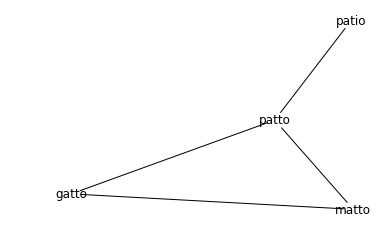

In [66]:
nx.draw_networkx(sottografi[0], node_color='w')
plt.axis('off');

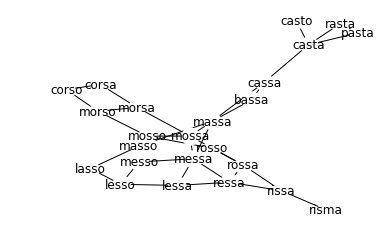

In [67]:
nx.draw_networkx(sottografi[1], node_color='w')
plt.axis('off');

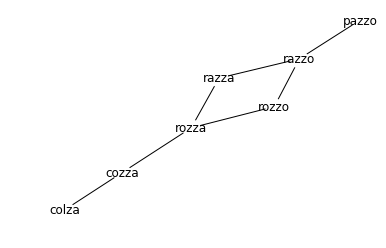

In [68]:
nx.draw_networkx(sottografi[2], node_color='w')
plt.axis('off');

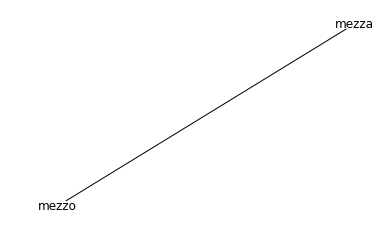

In [69]:
nx.draw_networkx(sottografi[3], node_color='w')
plt.axis('off');

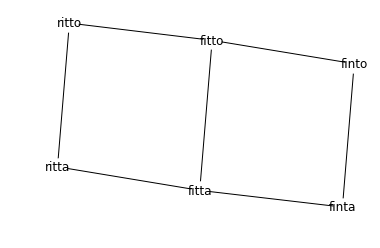

In [70]:
nx.draw_networkx(sottografi[4], node_color='w')
plt.axis('off');

In [71]:
words.degree()

DegreeView({'gatto': 2, 'patto': 3, 'matto': 2, 'patio': 1, 'masso': 4, 'lasso': 2, 'massa': 5, 'messo': 4, 'mosso': 5, 'lesso': 3, 'casto': 1, 'casta': 4, 'pasta': 2, 'rasta': 2, 'cassa': 3, 'messa': 5, 'lessa': 3, 'mossa': 5, 'ressa': 4, 'bassa': 2, 'pazzo': 1, 'razzo': 3, 'mezzo': 1, 'mezza': 1, 'rosso': 2, 'rossa': 4, 'rissa': 3, 'morso': 3, 'morsa': 3, 'corso': 2, 'corsa': 2, 'colza': 1, 'cozza': 2, 'rozza': 3, 'razza': 2, 'rozzo': 2, 'risma': 1, 'ritta': 2, 'ritto': 2, 'fitta': 3, 'fitto': 3, 'finto': 2, 'finta': 2})

In [72]:
import operator as op
sorted(words.degree(),
       key=op.itemgetter(1),
       reverse=True);

In [73]:
nx.betweenness_centrality(words)

{'gatto': 0.0,
 'patto': 0.0023228803716608595,
 'matto': 0.0,
 'patio': 0.0,
 'masso': 0.037940379403794036,
 'lasso': 0.0029036004645760743,
 'massa': 0.12433217189314752,
 'messo': 0.019231513743708867,
 'mosso': 0.05449090205187767,
 'lesso': 0.008168795973674023,
 'casto': 0.0,
 'casta': 0.07200929152148665,
 'pasta': 0.0,
 'rasta': 0.0,
 'cassa': 0.08826945412311266,
 'messa': 0.05245838172667441,
 'lessa': 0.012233836624080527,
 'mossa': 0.09223770809136661,
 'ressa': 0.025609756097560978,
 'bassa': 0.0,
 'pazzo': 0.0,
 'razzo': 0.006387921022067363,
 'mezzo': 0.0,
 'mezza': 0.0,
 'rosso': 0.0058362369337979095,
 'rossa': 0.036140147115756874,
 'rissa': 0.025551684088269452,
 'morso': 0.025687185443283005,
 'morsa': 0.03575300038714673,
 'corso': 0.002361595044521874,
 'corsa': 0.004684475416182733,
 'colza': 0.0,
 'cozza': 0.005807200929152149,
 'rozza': 0.009872241579558653,
 'razza': 0.003484320557491289,
 'rozzo': 0.003484320557491289,
 'risma': 0.0,
 'ritta': 0.000967866821

In [74]:
sorted(nx.betweenness_centrality(words).items(),
       key=op.itemgetter(1),
       reverse=True);

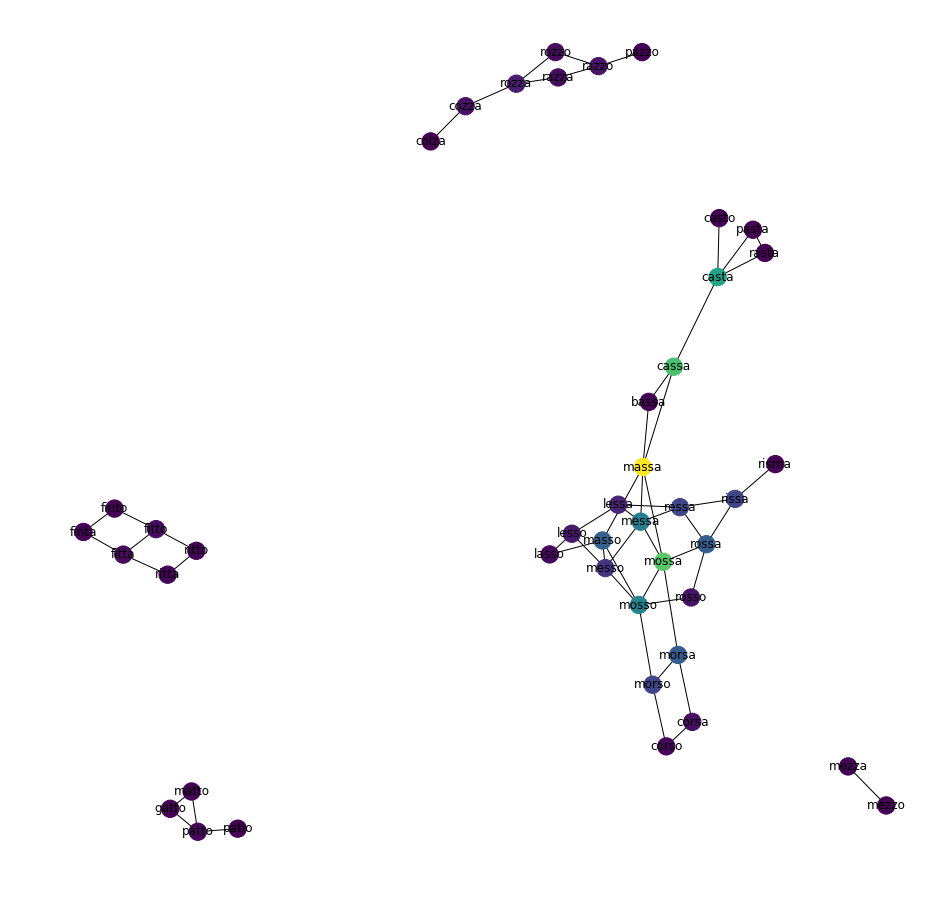

In [75]:
fig, ax = plt.subplots(figsize=(16, 16))
node_color = nx.betweenness_centrality(words).values()
loc = nx.spring_layout(words, k=1)
nx.draw_networkx(words,
                 loc=loc,
                 node_color=list(node_color),
                 cmap=plt.cm.viridis,
                 ax=ax)
ax.axis('off');

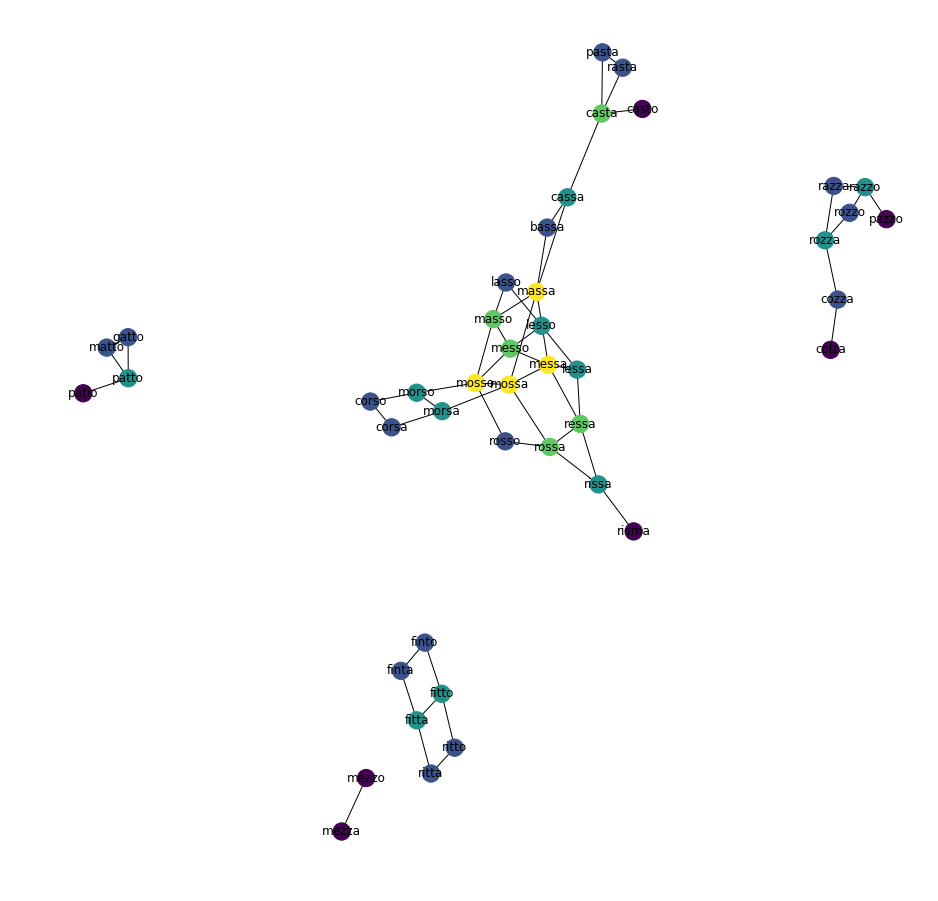

In [76]:
fig, ax = plt.subplots(figsize=(16, 16))
node_color = dict(words.degree()).values()
loc = nx.spring_layout(words, k=1)
nx.draw_networkx(words,
                 loc=loc,
                 node_color=list(node_color),
                 cmap=plt.cm.viridis,
                ax=ax)
ax.axis('off');

In [77]:
sottografi = list(nx.connected_component_subgraphs(words))

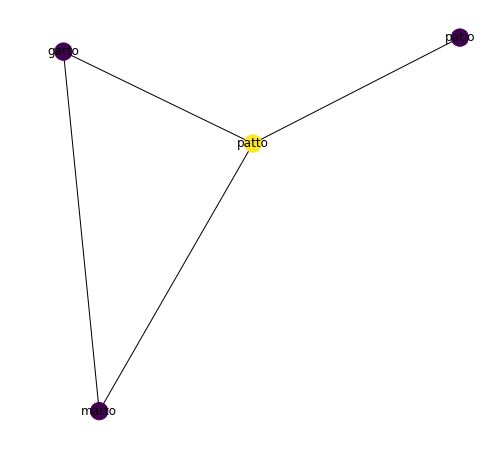

In [78]:
sottografo = sottografi[0]
fig, ax = plt.subplots(figsize=(8, 8))
node_color = nx.betweenness_centrality(sottografo).values()
loc = nx.spring_layout(words, k=1)
r = nx.draw_networkx(sottografo,
    loc=loc,
    node_color=list(node_color),
    cmap=plt.cm.viridis,
    ax=ax)
ax.axis('off');

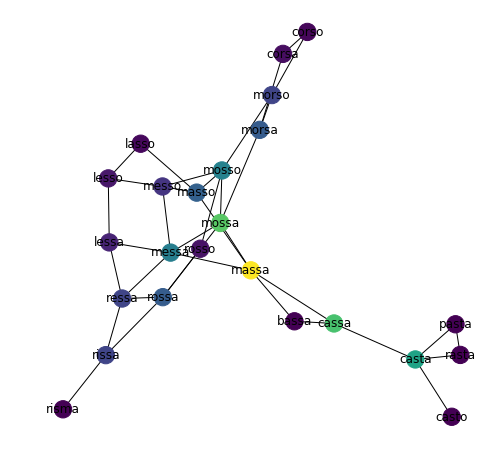

In [79]:
sottografo = sottografi[1]
fig, ax = plt.subplots(figsize=(8, 8))
node_color = nx.betweenness_centrality(sottografo).values()
loc = nx.spring_layout(words, k=1)
r = nx.draw_networkx(sottografo,
    loc=loc,
    node_color=list(node_color),
    cmap=plt.cm.viridis,
    ax=ax)
ax.axis('off');

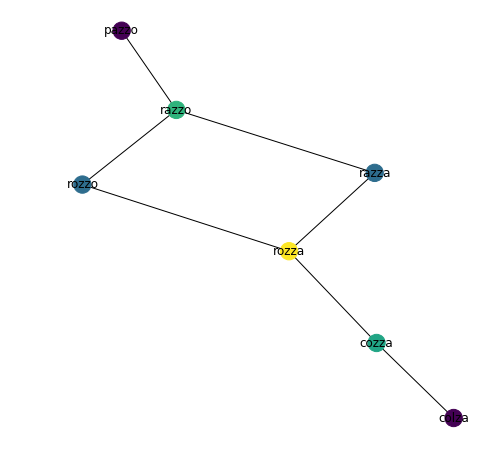

In [80]:
sottografo = sottografi[2]
fig, ax = plt.subplots(figsize=(8, 8))
node_color = nx.betweenness_centrality(sottografo).values()
loc = nx.spring_layout(words, k=1)
r = nx.draw_networkx(sottografo,
    loc=loc,
    node_color=list(node_color),
    cmap=plt.cm.viridis,
    ax=ax)
ax.axis('off');

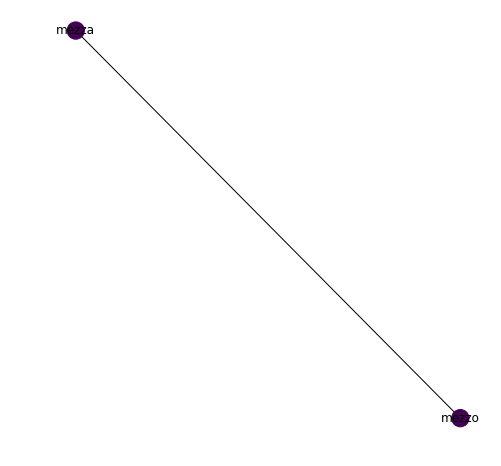

In [81]:
sottografo = sottografi[3]
fig, ax = plt.subplots(figsize=(8, 8))
node_color = nx.betweenness_centrality(sottografo).values()
loc = nx.spring_layout(words, k=1)
r = nx.draw_networkx(sottografo,
    loc=loc,
    node_color=list(node_color),
    cmap=plt.cm.viridis,
    ax=ax)
ax.axis('off');

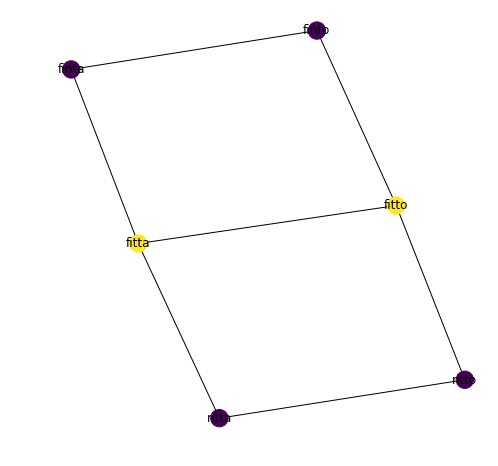

In [82]:
sottografo = sottografi[4]
fig, ax = plt.subplots(figsize=(8, 8))
node_color = nx.betweenness_centrality(sottografo).values()
loc = nx.spring_layout(words, k=1)
r = nx.draw_networkx(sottografo,
    loc=loc,
    node_color=list(node_color),
    cmap=plt.cm.viridis,
    ax=ax)
ax.axis('off');